# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
211074               2020-07-21           2020-07-20            2020-07-09   
211075               2020-07-21           2020-07-20            2020-07-09   
211076               2020-07-21           2020-07-20            2020-07-09   
211077               2020-07-21           2020-07-20            2020-07-09   
211078               2020-07-21           2020-07-20            2020-07-09   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
211074             2020-07-06 00:00:00                   NaT   
211075             2020-07-06 00:00:00                   NaT   
211076             2020-07-06 00:00:00                   NaT   
211077             2020-07-03 00:00:00                   NaT   
211078             2020-07-05 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
211074                    NaT            Sincelejo            Sucre      Leve   
211075                    NaT            Sincelejo            Sucre      Leve   
211076                    NaT            Sincelejo            Sucre      Leve   
211077                    NaT                Yopal         Casanare      Leve   
211078                    NaT                Neira           Caldas      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
211074            Casa  ...               20 - 30    F               NaN   
211075            Casa  ...               30 - 40    M               NaN   
211076            Casa  ...               40 - 50    M               NaN   
211077            Casa  ...               30 - 40    F               NaN   
211078            Casa  ...               20 - 30    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1032   1426
Antioquia                                            8116  10574
Arauca                                                 35    136
Archipiélago de San Andrés Providencia y Santa ...      9     21
Atlántico                                            9049  10383
Barranquilla D.E.                                   11994  14060
Bogotá D.C.                                         33530  34313
Bolívar                                               797   1009
Boyacá                                                328    331
Buenaventura D.E.                                     710   1215
Caldas                                                224    193
Caquetá                                               219    231
Cartagena D.T. y C.                                  6091   7612
Casanare                                               74    111
Cauca                                                 494    681
Cesar                                                 938   1188
Chocó                                                1164   1397
Cundinamarca                                         3039   3114
Córdoba                                              1481   1486
Guainía                                                 6      8
Guaviare                                                7     43
Huila                                                 293    285
La Guajira                                            776    839
Magdalena                                             795    863
Meta                                                  488   1522
Nariño                                               2604   3175
Norte de Santander                                    398    543
Putumayo                                              148    198
Quindío                                               117     98
Risaralda                                             573    504
Santa Marta D.T. y C.                                1367   1481
Santander                                             793   1253
Sucre                                                2102   2511
Tolima                                                589   1275
Valle del Cauca                                      7610   8906
Vaupés                                                 27     34
Vichada                                                 1      1

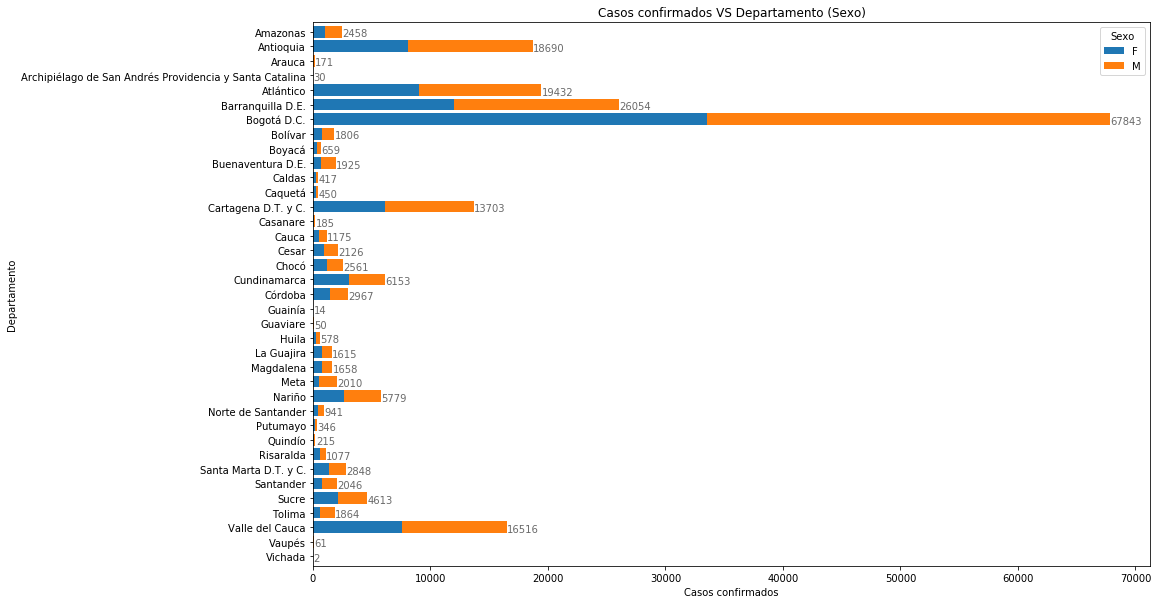

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               129      442      504   
Antioquia                                              676     1334     5047   
Arauca                                                   5       35       67   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              833     1418     4284   
Barranquilla D.E.                                      987     1625     5730   
Bogotá D.C.                                           3138     5382    15441   
Bolívar                                                 83      168      401   
Boyacá                                                  42       59      131   
Buenaventura D.E.                                       40      272      442   
Caldas                                                  14       26       88   
Caquetá                                                 12       27      138   
Cartagena D.T. y C.                                    559      962     3156   
Casanare                                                10        8       53   
Cauca                                                   55      103      266   
Cesar                                                  168      213      492   
Chocó                                                  108      220      600   
Cundinamarca                                           313      456     1406   
Córdoba                                                105      144      595   
Guainía                                                  0        2        4   
Guaviare                                                 0       19       10   
Huila                                                   33       58      111   
La Guajira                                              81      160      369   
Magdalena                                               93      125      294   
Meta                                                    31      134      654   
Nariño                                                 279      519     1362   
Norte de Santander                                      41       37      226   
Putumayo                                                 8       28       87   
Quindío                                                  8       14       33   
Risaralda                                               77       98      236   
Santa Marta D.T. y C.                                  118      194      632   
Santander                                               69      186      518   
Sucre                                                  191      344      990   
Tolima                                                  71      112      607   
Valle del Cauca                                        575     1164     3800   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                475      331      268   
Antioquia                                              4744     2909     2119   
Arauca                                                   42       12        6   
Archipiélago de San Andrés Providencia y Santa ...       10        6        3   
Atlántico                                              4576     3071     2522   
Barranquilla D.E.                                      6218     4065     3494   
Bogotá D.C.                                           14762    10837     9186   
Bolívar                                                 433      260      162   
Boyacá                                                  121      106 

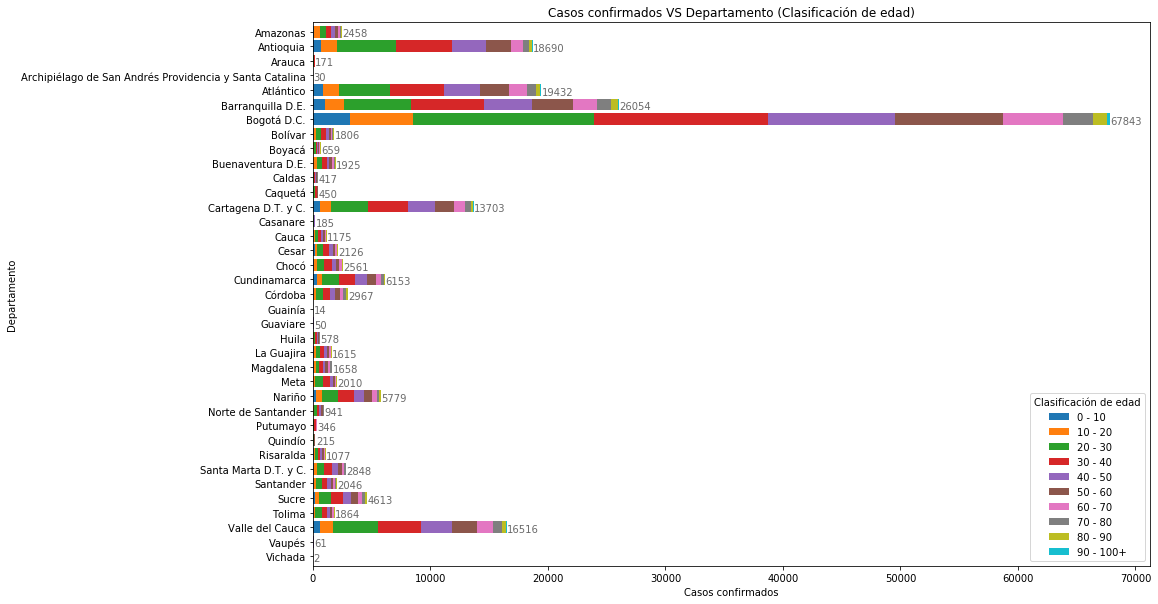

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               58.0      101.0   
Antioquia                                           12642.0      222.0   
Arauca                                                 77.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            6317.0      916.0   
Barranquilla D.E.                                    8603.0     1325.0   
Bogotá D.C.                                         35278.0     1713.0   
Bolívar                                               616.0       84.0   
Boyacá                                                234.0       22.0   
Buenaventura D.E.                                     331.0      126.0   
Caldas                                                135.0        7.0   
Caquetá                                               346.0        7.0   
Cartagena D.T. y C.                                  3925.0      425.0   
Casanare                                               87.0        2.0   
Cauca                                                 584.0       36.0   
Cesar                                                 764.0       41.0   
Chocó                                                 703.0       82.0   
Cundinamarca                                         2656.0      145.0   
Córdoba                                              1467.0      338.0   
Guainía                                                 0.0        1.0   
Guaviare                                                9.0        0.0   
Huila                                                 178.0       17.0   
La Guajira                                            925.0       88.0   
Magdalena                                             523.0      168.0   
Meta                                                  590.0       25.0   
Nariño                                               1876.0      175.0   
Norte de Santander                                    540.0       40.0   
Putumayo                                              252.0       17.0   
Quindío                                                38.0        6.0   
Risaralda                                             477.0       21.0   
Santa Marta D.T. y C.                                1428.0      109.0   
Santander                                            1078.0       53.0   
Sucre                                                2468.0      247.0   
Tolima                                                687.0       33.0   
Valle del Cauca                                      6262.0      572.0   
Vaupés                                                 32.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                12.0           6.0   
Antioquia                                              805.0         140.0   
Arauca                                                   7.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              694.0         100.0   
Barranquilla D.E.                                      950.0         123.0   
Bogotá D.C.                                           3994.0         347.0   
Bolívar                                                102.0           6.0   
Boyacá                                                  43.0           5.0   
Buenaventura D.E.                                      116.0          25.0   
Caldas                                                  18.0           6.0   
Caquetá                                                 47.0           4.0   
Cartagena D.T. y C.  

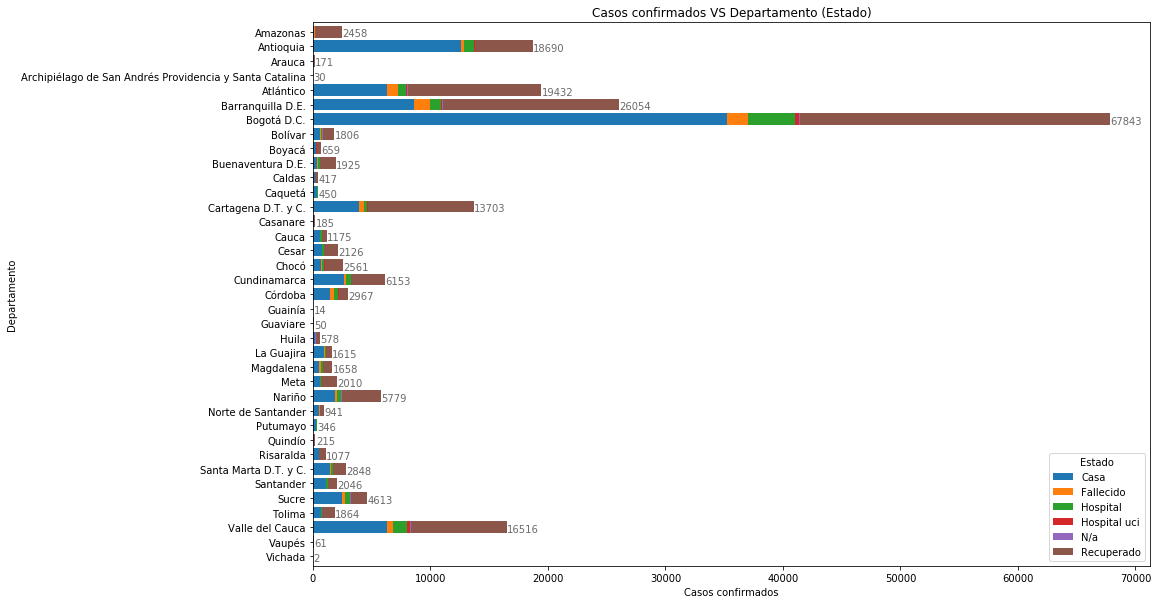

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          43868  48324
Fallecido      2654   4512
Hospital       4672   6309
Hospital uci    506    945
N/a             172    236
Recuperado    46146  52694

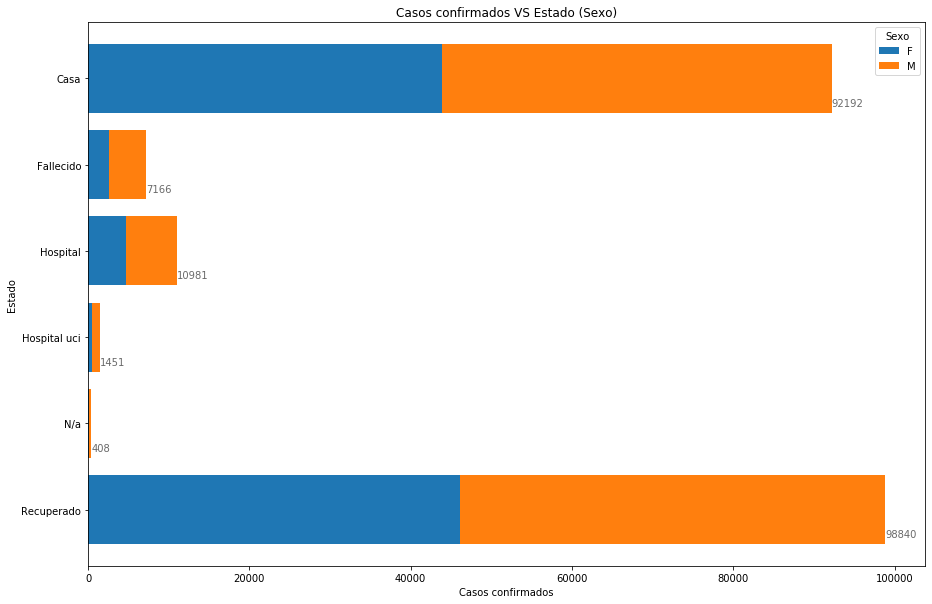

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3852     7105    23214    23047    14903    11189   
Fallecido                  14       15      102      250      582     1122   
Hospital                  413      252      904     1437     1732     2286   
Hospital uci               53       24       51      155      211      356   
N/a                        11        8       15       19       28       48   
Recuperado               4613     8691    24515    23691    15508    11790   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5439     2322      952        169  
Fallecido                 1705     1763     1307        306  
Hospital                  1956     1283      628         90  
Hospital uci               321      207       67          6  
N/a                         88       89       80         22  
Recuperado                6068     2739     1057        168

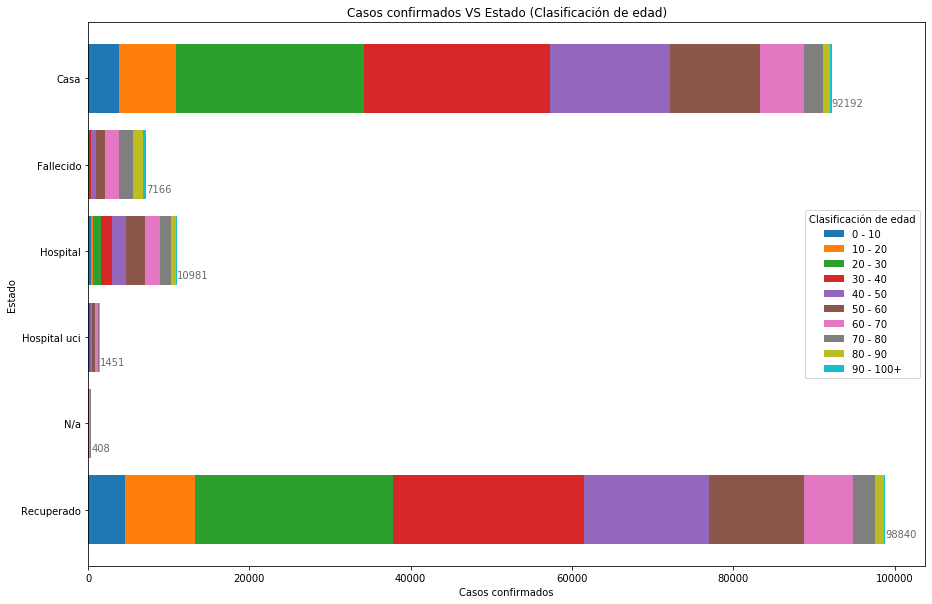

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F       M
Tipo                      
En estudio   91948  100355
Importado      453     513
Relacionado   5617   12152

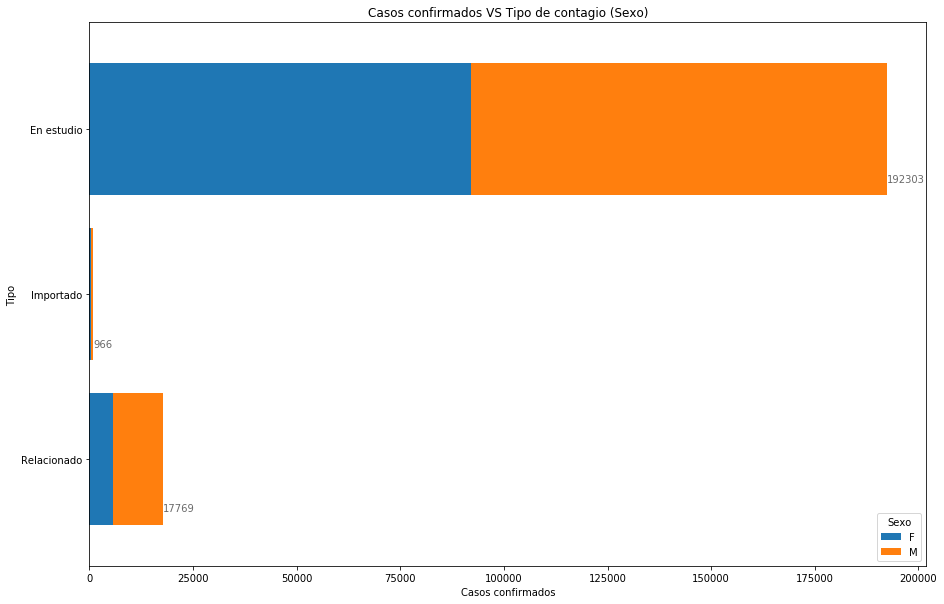

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               8110    13700    43587    44136    30560    25015   
Importado                   6       36      239      226      171      149   
Relacionado               840     2359     4975     4237     2233     1627   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               14658     7959     3868        710  
Importado                   94       35        9          1  
Relacionado                825      409      214         50

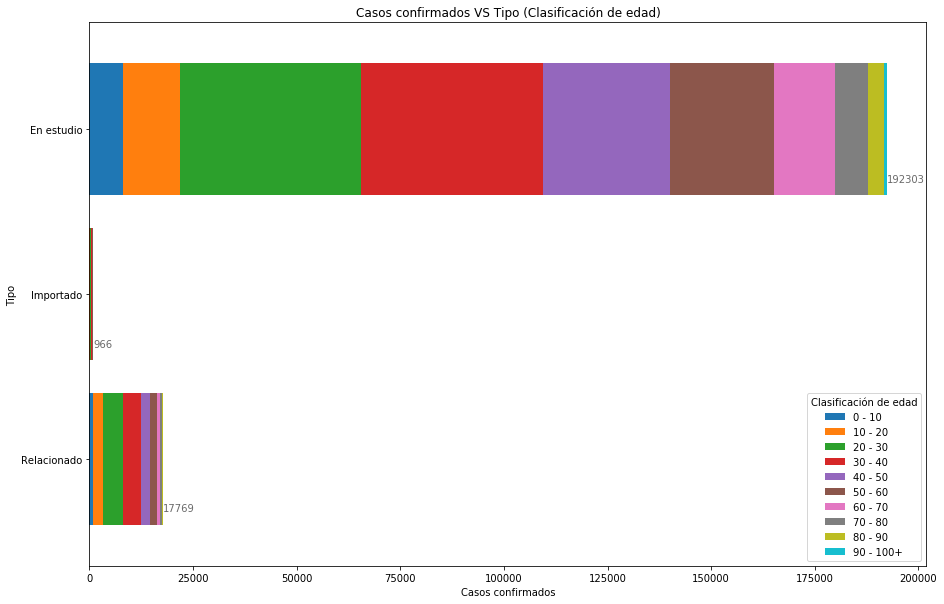

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  4465   4491
10 - 20                 7381   8714
20 - 30                22941  25860
30 - 40                22133  26466
40 - 50                15341  17623
50 - 60                12358  14433
60 - 70                 7141   8436
70 - 80                 3804   4599
80 - 90                 2009   2082
90 - 100+                445    316

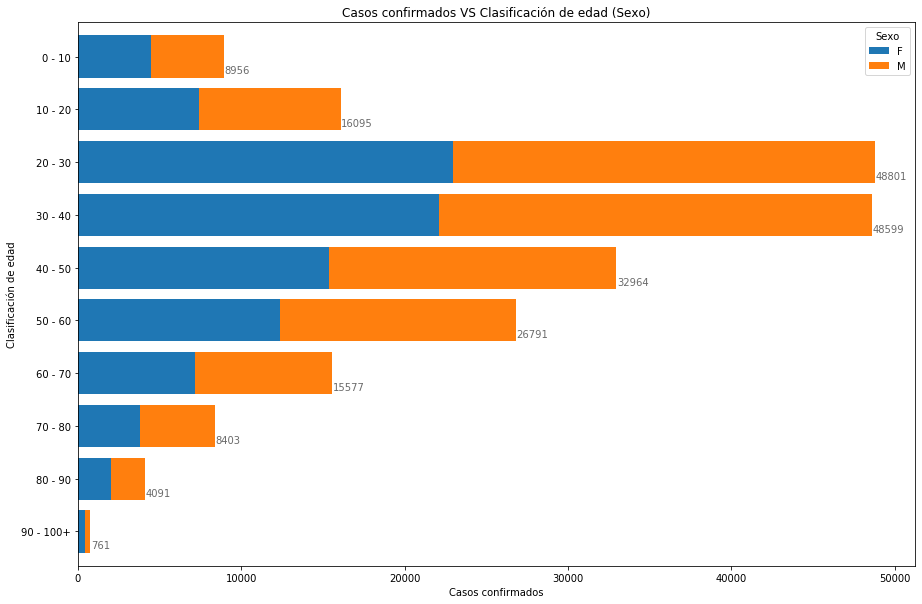

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3852         14       413            53   11   
10 - 20                 7105         15       252            24    8   
20 - 30                23214        102       904            51   15   
30 - 40                23047        250      1437           155   19   
40 - 50                14903        582      1732           211   28   
50 - 60                11189       1122      2286           356   48   
60 - 70                 5439       1705      1956           321   88   
70 - 80                 2322       1763      1283           207   89   
80 - 90                  952       1307       628            67   80   
90 - 100+                169        306        90             6   22   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       4613  
10 - 20                      8691  
20 - 30                     24515  
30 - 40                     23691  
40 - 50                     15508  
50 - 60                     11790  
60 - 70                      6068  
70 - 80                      2739  
80 - 90                      1057  
90 - 100+                     168

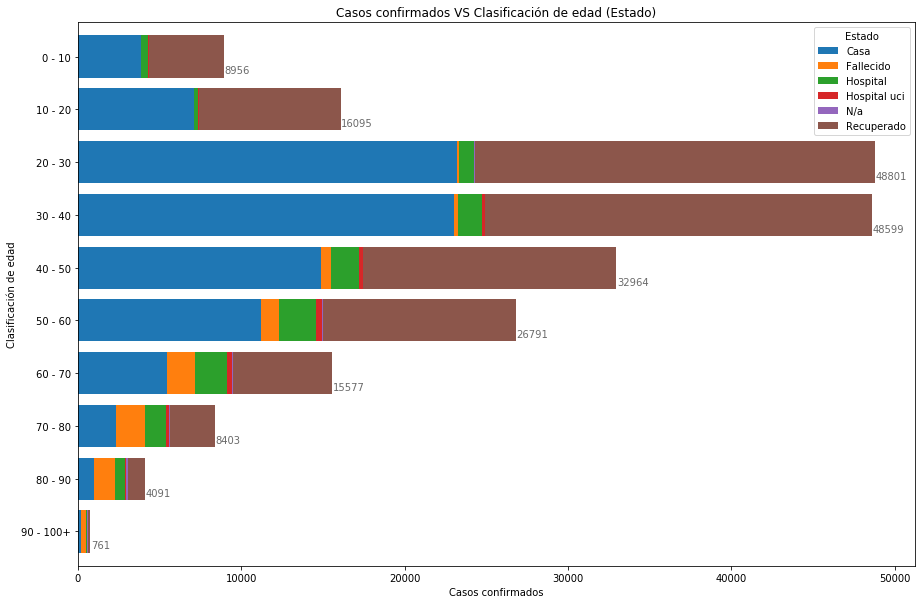

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-17            1446.0  1511.0
2020-07-18            2530.0  2745.0
2020-07-19            3453.0  3792.0
2020-07-20            2054.0  2330.0
2020-07-21             888.0  1064.0

[135 rows x 2 columns]

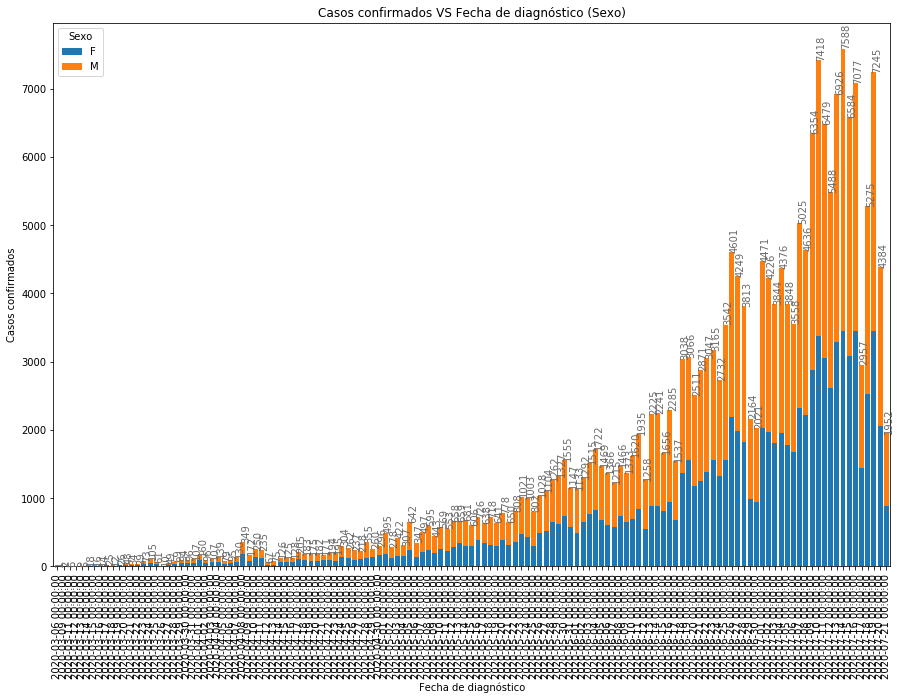

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-17                103      171      674      717      438      382   
2020-07-18                207      309     1162     1313      853      698   
2020-07-19                290      594     1685     1713     1194      881   
2020-07-20                167      278      912     1024      725      603   
2020-07-21                 64      120      495      458      331      224   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-17                 253      122       78         19  
2020-07-18                 388      215      109         21  
2020-07-19                 502      240      120         26  
2020-07-20                 372      196       84         23  
2020-07-21                 134       86       36          4  

[135 rows x 10 columns]

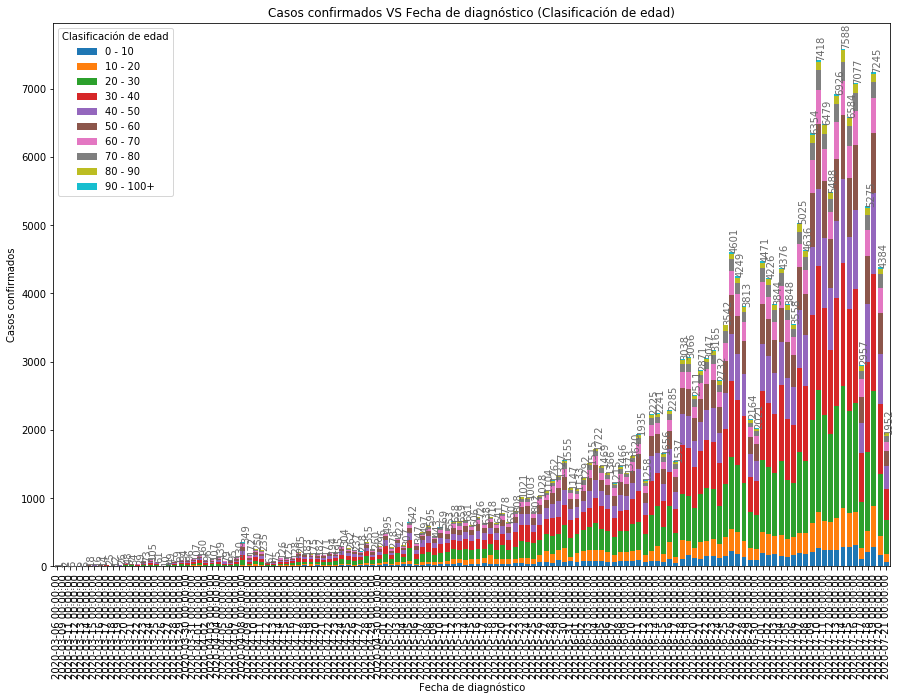

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-17            2673.0       80.0     178.0          16.0  3.0   
2020-07-18            4841.0       74.0     296.0          17.0  4.0   
2020-07-19            6691.0       95.0     418.0          23.0  3.0   
2020-07-20            3882.0       36.0     445.0          20.0  1.0   
2020-07-21            1790.0        0.0     137.0          25.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-17                   7.0  
2020-07-18                  43.0  
2020-07-19                  15.0  
2020-07-20                   0.0  
2020-07-21                   0.0  

[135 rows x 6 columns]

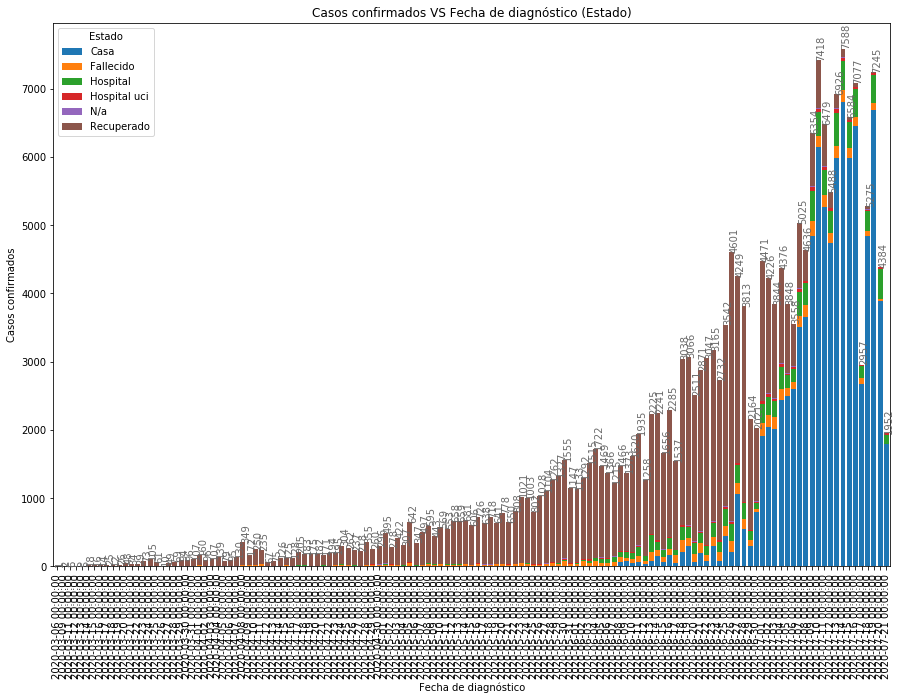

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F         M
Fecha de diagnóstico                   
2020-03-06                1.0       0.0
2020-03-09                2.0       1.0
2020-03-11                6.0       3.0
2020-03-12               11.0       3.0
2020-03-13               13.0       6.0
...                       ...       ...
2020-07-17            87318.0  101100.0
2020-07-18            89848.0  103845.0
2020-07-19            93301.0  107637.0
2020-07-20            95355.0  109967.0
2020-07-21            96243.0  111031.0

[135 rows x 2 columns]

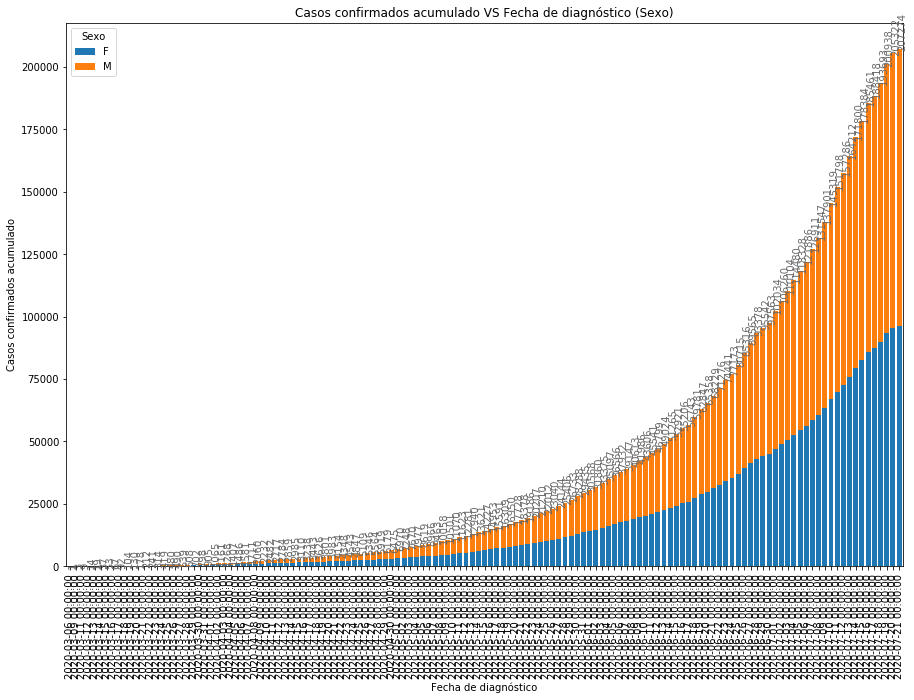

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-17               8097    14519    43649    43185    29308    23924   
2020-07-18               8304    14828    44811    44498    30161    24622   
2020-07-19               8594    15422    46496    46211    31355    25503   
2020-07-20               8761    15700    47408    47235    32080    26106   
2020-07-21               8825    15820    47903    47693    32411    26330   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-17               13893     7508     3658        677  
2020-07-18               14281     7723     3767        698  
2020-07-19               14783     7963     3887        724  
2020-07-20               15155     8159     3971        747  
2020-07-21               15289     8245     4007        751  

[135 rows x 10 columns]

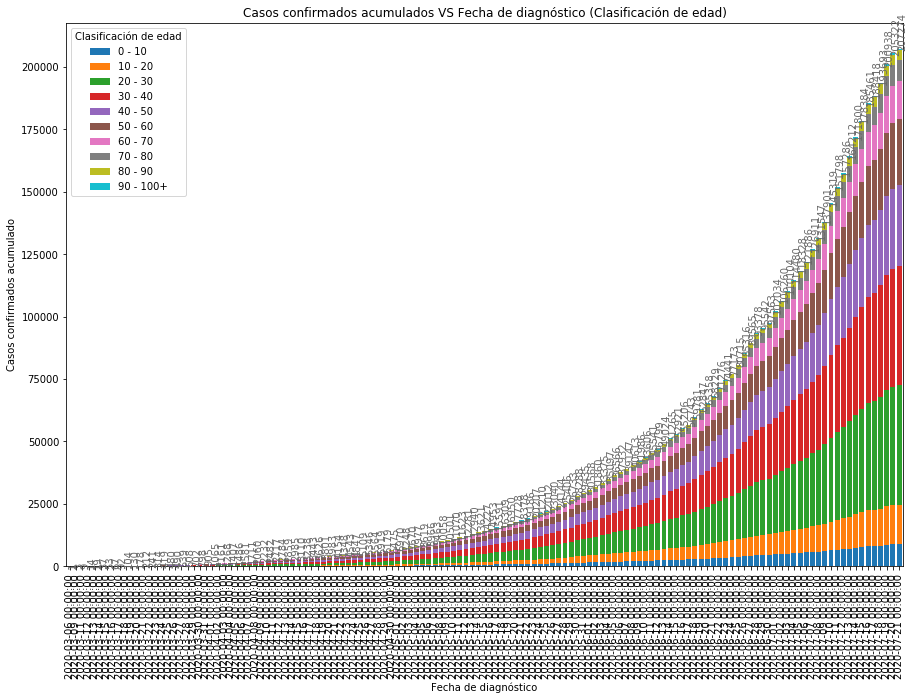

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-17            74900.0     6792.0    9530.0        1332.0  382.0   
2020-07-18            79741.0     6866.0    9826.0        1349.0  386.0   
2020-07-19            86432.0     6961.0   10244.0        1372.0  389.0   
2020-07-20            90314.0     6997.0   10689.0        1392.0  390.0   
2020-07-21            92104.0     6997.0   10826.0        1417.0  390.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-17               95482.0  
2020-07-18               95525.0  
2020-07-19               95540.0  
2020-07-20               95540.0  
2020-07-21               95540.0  

[135 rows x 6 columns]

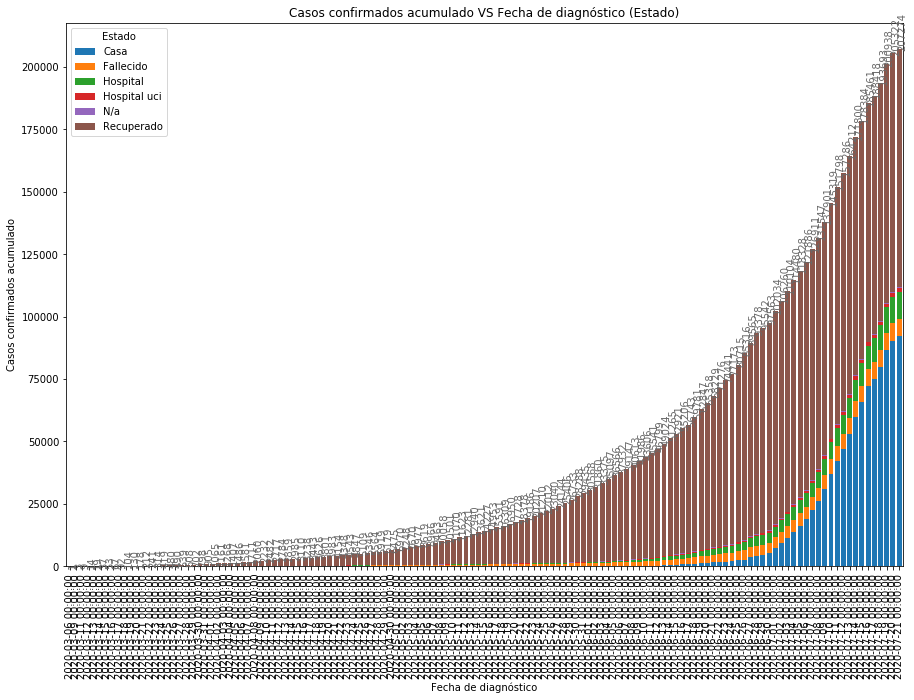

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>